In [1]:
import sys
import numpy as np
import h5py
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
from feature_extractor import FeatureExtractor

from cellpose import models, utils, plot
from cellpose.io import logger_setup, imread
logger_setup();

2023-06-27 16:58:47,395 [INFO] WRITING LOG OUTPUT TO /home/rai/.cellpose/run.log
2023-06-27 16:58:47,396 [INFO] 
cellpose version: 	2.2.2 
platform:       	linux 
python version: 	3.11.3 
torch version:  	2.0.1+cu117


In [ ]:
import IPython

%load_ext autoreload
%autoreload 2

# NOTE: Don't run the following cells if you have the csv files already (it will take a long time)

In [3]:
# Open the HDF5 file
DATA_FOLDER = Path("/home/rai/Documents/MSCE/Sem2/ami/project_datashare")
filepath_unlabeled = DATA_FOLDER / "sample01.pre"
file_unlabeled = h5py.File(filepath_unlabeled, 'r')

# Access the dataset
# List dataset in the file
amplitude_unlabeled = file_unlabeled['amplitude/images']
phase_unlabeled = file_unlabeled['phase/images']

nimgs_unlabeled = np.shape(amplitude_unlabeled)[0]

In [4]:
print(nimgs_unlabeled)

7962


In [5]:
from tqdm import tqdm

imgs_idx_unlabeled = range(0, 500)

imgs_phase_unlabeled = []
imgs_ampl_unlabeled = []

for img_idx in tqdm(imgs_idx_unlabeled, desc='Processing images', unit='image'):
    imgs_phase_unlabeled.append(phase_unlabeled[img_idx])
    imgs_ampl_unlabeled.append(amplitude_unlabeled[img_idx])


Processing images: 100%|█████████████████████████████████████████████████████| 500/500 [08:53<00:00,  1.07s/image]


In [6]:
model = models.Cellpose(gpu=True, model_type='cyto')
masks_phase_unlabeled, flows_phase_unlabeled, styles_phase_unlabeled, diams_phase_unlabeled = model.eval(imgs_phase_unlabeled, diameter=None, channels=[0,0],
                                         flow_threshold=0.4, do_3D=False, cellprob_threshold=-0.0, min_size=-1, augment=True, net_avg=True, resample=True)

2023-06-27 17:07:42,115 [INFO] ** TORCH CUDA version installed and working. **
2023-06-27 17:07:42,116 [INFO] >>>> using GPU
2023-06-27 17:07:42,116 [INFO] >> cyto << model set to be used
2023-06-27 17:07:42,194 [INFO] >>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
2023-06-27 17:07:42,195 [INFO] ~~~ ESTIMATING CELL DIAMETER(S) ~~~
2023-06-27 17:07:44,479 [INFO] 1%|          | 4/500 [00:02<03:51,  2.14it/s]


/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2023-06-27 17:08:23,465 [INFO] 18%|#8        | 92/500 [00:41<03:21,  2.02it/s]
2023-06-27 17:08:23,764 [INFO] No cell pixels found.
2023-06-27 17:09:27,644 [INFO] 49%|####8     | 243/500 [01:45<02:09,  1.98it/s]
2023-06-27 17:09:27,949 [INFO] No cell pixels found.
2023-06-27 17:10:35,442 [INFO] 79%|#######9  | 397/500 [02:53<00:39,  2.61it/s]
2023-06-27 17:10:35,748 [INFO] No cell pixels found.
2023-06-27 17:10:59,298 [INFO] 91%|######### | 454/500 [03:17<00:16,  2.75it/s]
2023-06-27 17:10:59,604 [INFO] No cell pixels found.
2023-06-27 17:11:19,032 [INFO] 100%|##########| 500/500 [03:36<00:00,  2.31it/s]
2023-06-27 17:11:19,033 [INFO] estimated cell diameter(s) in 216.84 sec
2023-06-27 17:11:19,033 [INFO] >>> diameter(s) = 
2023-06-27 17:11:19,033 [INFO] [26.97, 31.98, 26.23, 30.00, 39.83, 30.00, 17.73, 17.84, 17.20, 16.64, 16.50, 23.92, 20.81, 25.12, 27.34, 30.82, 30.00, 15.45, 20.40, 17.79, 30.00, 18.23, 26.32, 34.71, 24.04, 24.70, 15.88, 33.57, 30.00, 27.96, 18.09, 17.95, 23.62, 20.

In [7]:
def image_to_masks(image):
    unique_labels = np.unique(image)  # Get the unique labels in the image

    masks = []
    for label in unique_labels:
        if label == 0:
            continue  # Skip the background label

        mask = np.where(image == label, 255, 0).astype(np.uint8)  # Convert to CV_8UC1 format
        masks.append(mask)

    return masks

In [8]:
idx_list = list(imgs_idx_unlabeled)
masks_array_unlabeled = []
id_array_unlabeled = []
for idx, _ in enumerate(imgs_phase_unlabeled):
    masks = image_to_masks(masks_phase_unlabeled[idx])
    image_id = idx_list[idx]
    masks_array_unlabeled.append(masks)
    id_array_unlabeled.append(image_id)

# Run from here on if you have the csv files

In [132]:
from feature_extractor import FeatureExtractor

#fe_unlabeled = FeatureExtractor(imgs_phase_unlabeled, imgs_ampl_unlabeled, masks_array_unlabeled)
#fe_unlabeled.extract_features_multiple_masks(image_ids=id_array_unlabeled)
#df_unlabeled = fe_unlabeled.features.copy()
df_unlabeled = pd.read_csv("unlabeled_examples.csv")

Extracting features: 100%|███████████████████████████████████████████████████| 500/500 [02:35<00:00,  3.22image/s]


In [133]:
df_unlabeled

,Volume,Roundness,Opacity,AmplitudeVariance,AmplitudeSkewness,MaxAmplitude,MinAmplitude,DryMassDensity,MaxPhase,MinPhase,...,PhaseSTDLocalMax,PhaseSTDLocalCentroidDisplacement,AmplitudeSTDLocalMean,AmplitudeSTDLocalVariance,AmplitudeSTDLocalSkewness,AmplitudeSTDLocalKurtosis,AmplitudeSTDLocalMin,AmplitudeSTDLocalMax,AmplitudeSTDLocalCentroidDisplacement,Image ID
0,335.455433,0.922908,12.233833,0.001193,0.451795,0.145142,-0.039215,0.058539,2.970703,-0.125244,...,0.690310,24522.407709,0.017079,1.295659e-04,1.615817,5.861998,0.003465,0.066040,24545.010024,0
1,218.376582,0.857438,12.120816,0.001647,0.503977,0.129395,-0.031372,0.050292,1.867188,-0.075012,...,0.420034,6205.832113,0.021802,1.515833e-04,0.236641,2.093714,0.002428,0.053006,6210.126035,0
2,397.181887,0.864605,12.313433,0.000328,0.311589,0.058838,-0.019608,0.054496,2.246094,-0.116821,...,0.556307,26216.234512,0.010721,3.814970e-05,0.609642,2.295979,0.002467,0.027664,26238.373459,1
3,53.409377,0.784959,12.500000,0.000005,-0.196262,0.003922,-0.003922,0.006130,0.102112,-0.031982,...,0.040583,45151.607257,0.002047,2.025188e-07,-0.755626,5.407093,0.000000,0.003162,45154.306401,1
4,241.835004,0.918540,12.278369,0.001011,0.843964,0.109802,-0.031372,0.086293,3.376953,-0.189697,...,0.668612,31871.217078,0.017134,1.101824e-04,0.663508,2.628324,0.002264,0.047827,31908.899576,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,71.086127,0.985532,12.500000,0.000033,0.025513,0.015686,-0.015686,0.039307,0.530762,-0.014938,...,0.140730,27194.206637,0.004446,1.706116e-06,0.805170,3.571471,0.001735,0.008939,27201.898125,498
7821,33.173526,0.734917,12.493323,0.000057,0.407178,0.019608,-0.015686,0.031562,0.612793,0.003052,...,0.166130,28651.507462,0.005422,2.443954e-06,0.821741,3.741352,0.002667,0.010248,28661.901424,498
7822,315.432841,0.927747,12.145110,0.002485,0.642907,0.160767,-0.047058,0.059955,2.257812,-0.145508,...,0.693906,18088.351572,0.027012,3.120096e-04,0.674044,2.393197,0.001339,0.075142,18104.015577,499
7823,591.472120,0.699009,12.269433,0.000968,1.670282,0.149048,-0.019608,0.039162,3.666016,-0.260254,...,0.785284,35148.808073,0.014992,1.815733e-04,1.061051,3.258125,0.000980,0.056489,35183.648143,499


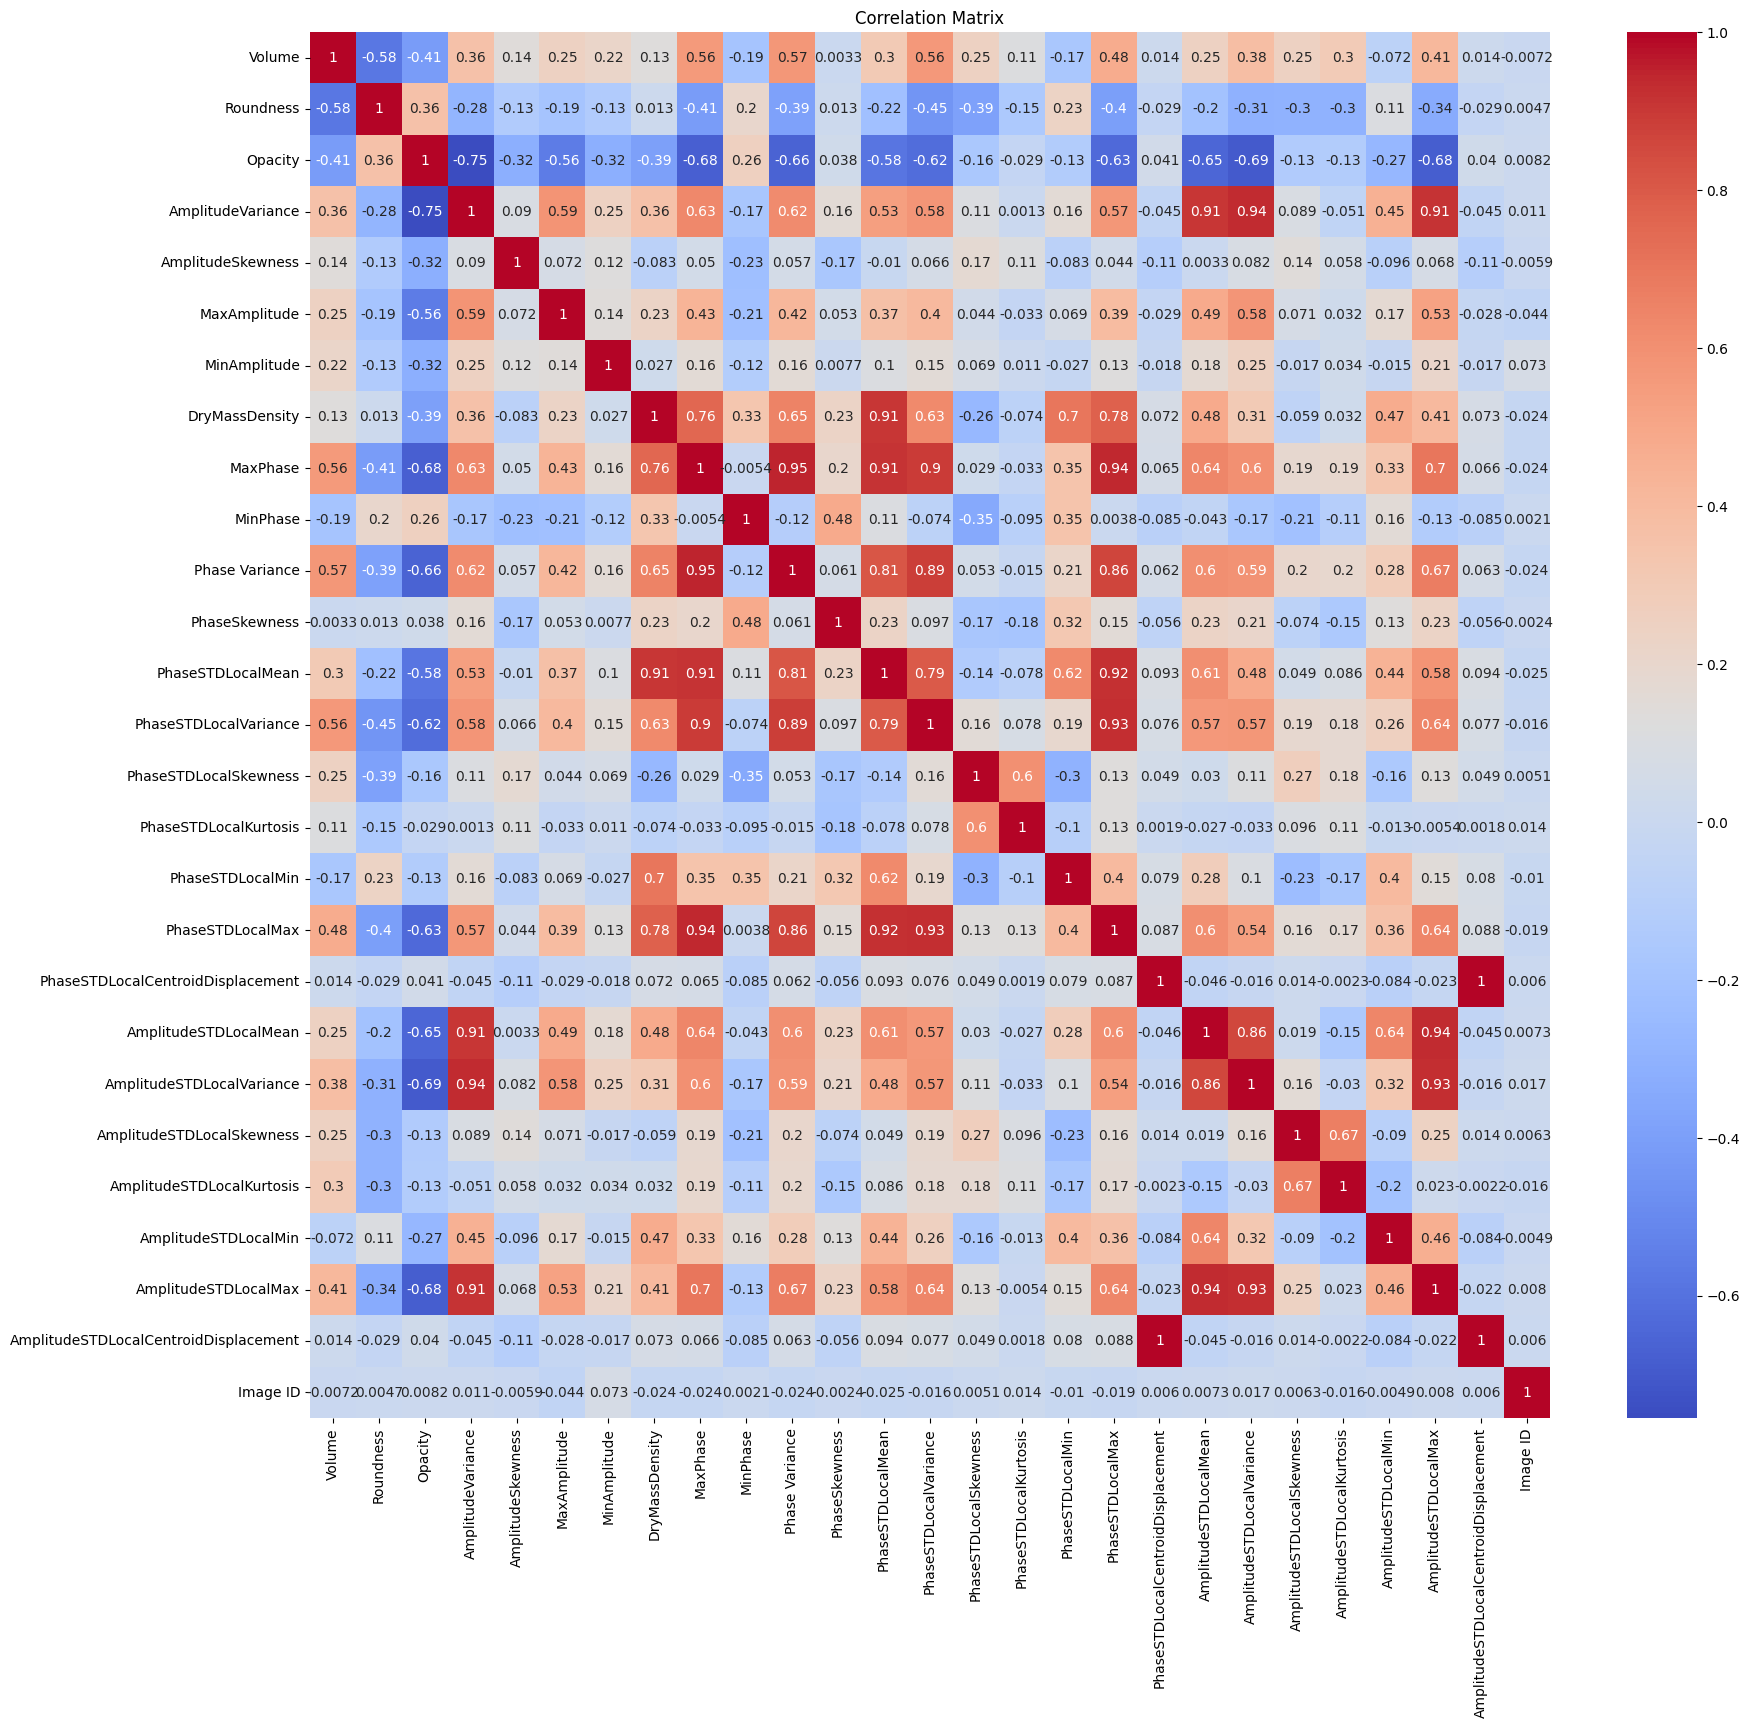

In [121]:
import seaborn as sns 
# Assuming you have a DataFrame called df with your features
correlation_matrix = df_unlabeled.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [92]:
filepath = DATA_FOLDER / "prediction.seg"
file = h5py.File(filepath, 'r')

# Access the dataset
# List dataset in the file
amplitude = file['amplitude/images']
phase = file['phase/images']
label = file['label/ground_truth']
mask = file['mask/images']

nimgs = np.shape(amplitude)[0]

mask_array = []
for img_idx in range(nimgs):
    mask_array.append(mask[img_idx])

In [134]:
#fe2 = FeatureExtractor(phase, amplitude, mask_array)
#fe2.extract_features()
#df_labeled = fe2.features.copy()
#df_labeled['Labels'] = label
df_labeled = pd.read_csv("labeled_examples.csv")

In [135]:
#df_labeled.to_csv('labeled_examples.csv', index=False)
#df_unlabeled.to_csv('unlabeled_sample01_cellpose.csv', index=False)

In [142]:
df_labeled

,Volume,Roundness,Opacity,AmplitudeVariance,AmplitudeSkewness,MaxAmplitude,MinAmplitude,DryMassDensity,MaxPhase,MinPhase,PhaseVariance,PhaseSkewness,PhaseSTDLocalMean,PhaseSTDLocalVariance,PhaseSTDLocalSkewness,AmplitudeSTDLocalMean,AmplitudeSTDLocalKurtosis,AmplitudeSTDLocalMin,AmplitudeSTDLocalMax,Labels
0,192.216887,0.961294,12.440019,0.000404,0.222737,0.05490,-0.04706,0.148152,3.512,-0.05853,1.347115,0.151507,0.395403,0.036273,-0.059989,0.012613,3.016030,0.001735,0.028314,b'wbc'
1,17.202843,1.043580,12.334858,0.000249,-0.321839,0.04706,-0.01569,0.177625,1.396,0.03665,0.134606,0.224105,0.270144,0.005691,-0.974006,0.010319,2.394671,0.002671,0.021553,b'plt'
2,39.985946,0.987901,12.009360,0.000641,-0.167076,0.09410,-0.01960,0.156106,1.624,0.09503,0.165807,0.210170,0.267518,0.007783,-0.571151,0.019953,2.203670,0.006445,0.037545,b'oof'
3,1027.158992,0.721094,12.389170,0.000297,-0.096284,0.06274,-0.05100,0.087903,3.473,-0.27220,0.955006,-0.100018,0.283486,0.014797,0.634010,0.010350,3.462792,0.002569,0.027441,b'agg'
4,170.606705,0.983194,12.231250,0.000968,0.930308,0.11370,-0.03530,0.123606,2.980,-0.17350,0.761022,0.251738,0.332043,0.016235,0.237499,0.018252,2.600461,0.001961,0.048930,b'rbc'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,150.418245,0.986904,12.466542,0.000206,0.403621,0.04315,-0.02745,0.114736,2.094,0.02664,0.384657,-0.152236,0.250812,0.013855,-0.262903,0.010026,5.308947,0.002819,0.027807,b'wbc'
107,17.202843,1.018127,11.425781,0.001215,-0.024194,0.16080,0.01960,0.165244,1.778,-0.23830,0.227547,0.576090,0.327947,0.005351,-0.308835,0.031074,2.733917,0.008306,0.076970,b'oof'
108,48.528129,0.738422,12.455611,0.000122,0.748587,0.03920,-0.01960,0.084173,1.414,-0.00906,0.107143,0.211272,0.261618,0.004633,-0.313514,0.007341,3.451568,0.001877,0.019517,b'agg'
109,297.234792,0.933343,12.360747,0.000706,1.020639,0.10590,-0.03920,0.174928,5.105,-0.57400,2.511811,0.259282,0.461438,0.039753,0.259262,0.014295,3.967834,0.001754,0.044341,b'wbc'


In [296]:
df_labeled = pd.read_csv("labeled_examples.csv")
df_unlabeled = pd.read_csv("unlabeled_sample01_cellpose.csv")
selected_columns = ['Volume', 'Roundness', 'Opacity', 'AmplitudeVariance', 'AmplitudeSkewness', 'DryMassDensity', 'MaxPhase', 'PhaseVariance', 'PhaseSkewness', 'PhaseSTDLocalMean', 'PhaseSTDLocalVariance', 'PhaseSTDLocalSkewness']
df_unlabeled = df_unlabeled[selected_columns]
df_labeled = df_labeled[selected_columns+['Labels']]
#df_unlabeled = df_unlabeled.drop(['DryMassDensity', 'AmplitudeVariance', 'PhaseVariance', 'MaxPhase', 'MaxAmplitude', 'MinAmplitude', 'MinPhase', 'PhaseSTDLocalVariance','AmplitudeSTDLocalMax', 'PhaseSTDLocalKurtosis', 'PhaseSTDLocalMin', 'PhaseSTDLocalMax', 'PhaseSTDLocalCentroidDisplacement', 'AmplitudeSTDLocalVariance', 'AmplitudeSTDLocalSkewness', 'AmplitudeSTDLocalKurtosis', 'AmplitudeSTDLocalCentroidDisplacement'], axis=1)
#df_labeled = df_labeled.drop(['DryMassDensity', 'AmplitudeVariance','PhaseVariance', 'MaxPhase', 'MaxAmplitude', 'MinAmplitude', 'MinPhase', 'PhaseSTDLocalVariance', 'AmplitudeSTDLocalMax','PhaseSTDLocalKurtosis', 'PhaseSTDLocalMin', 'PhaseSTDLocalMax', 'PhaseSTDLocalCentroidDisplacement', 'AmplitudeSTDLocalVariance', 'AmplitudeSTDLocalSkewness', 'AmplitudeSTDLocalKurtosis', 'AmplitudeSTDLocalCentroidDisplacement'], axis=1)

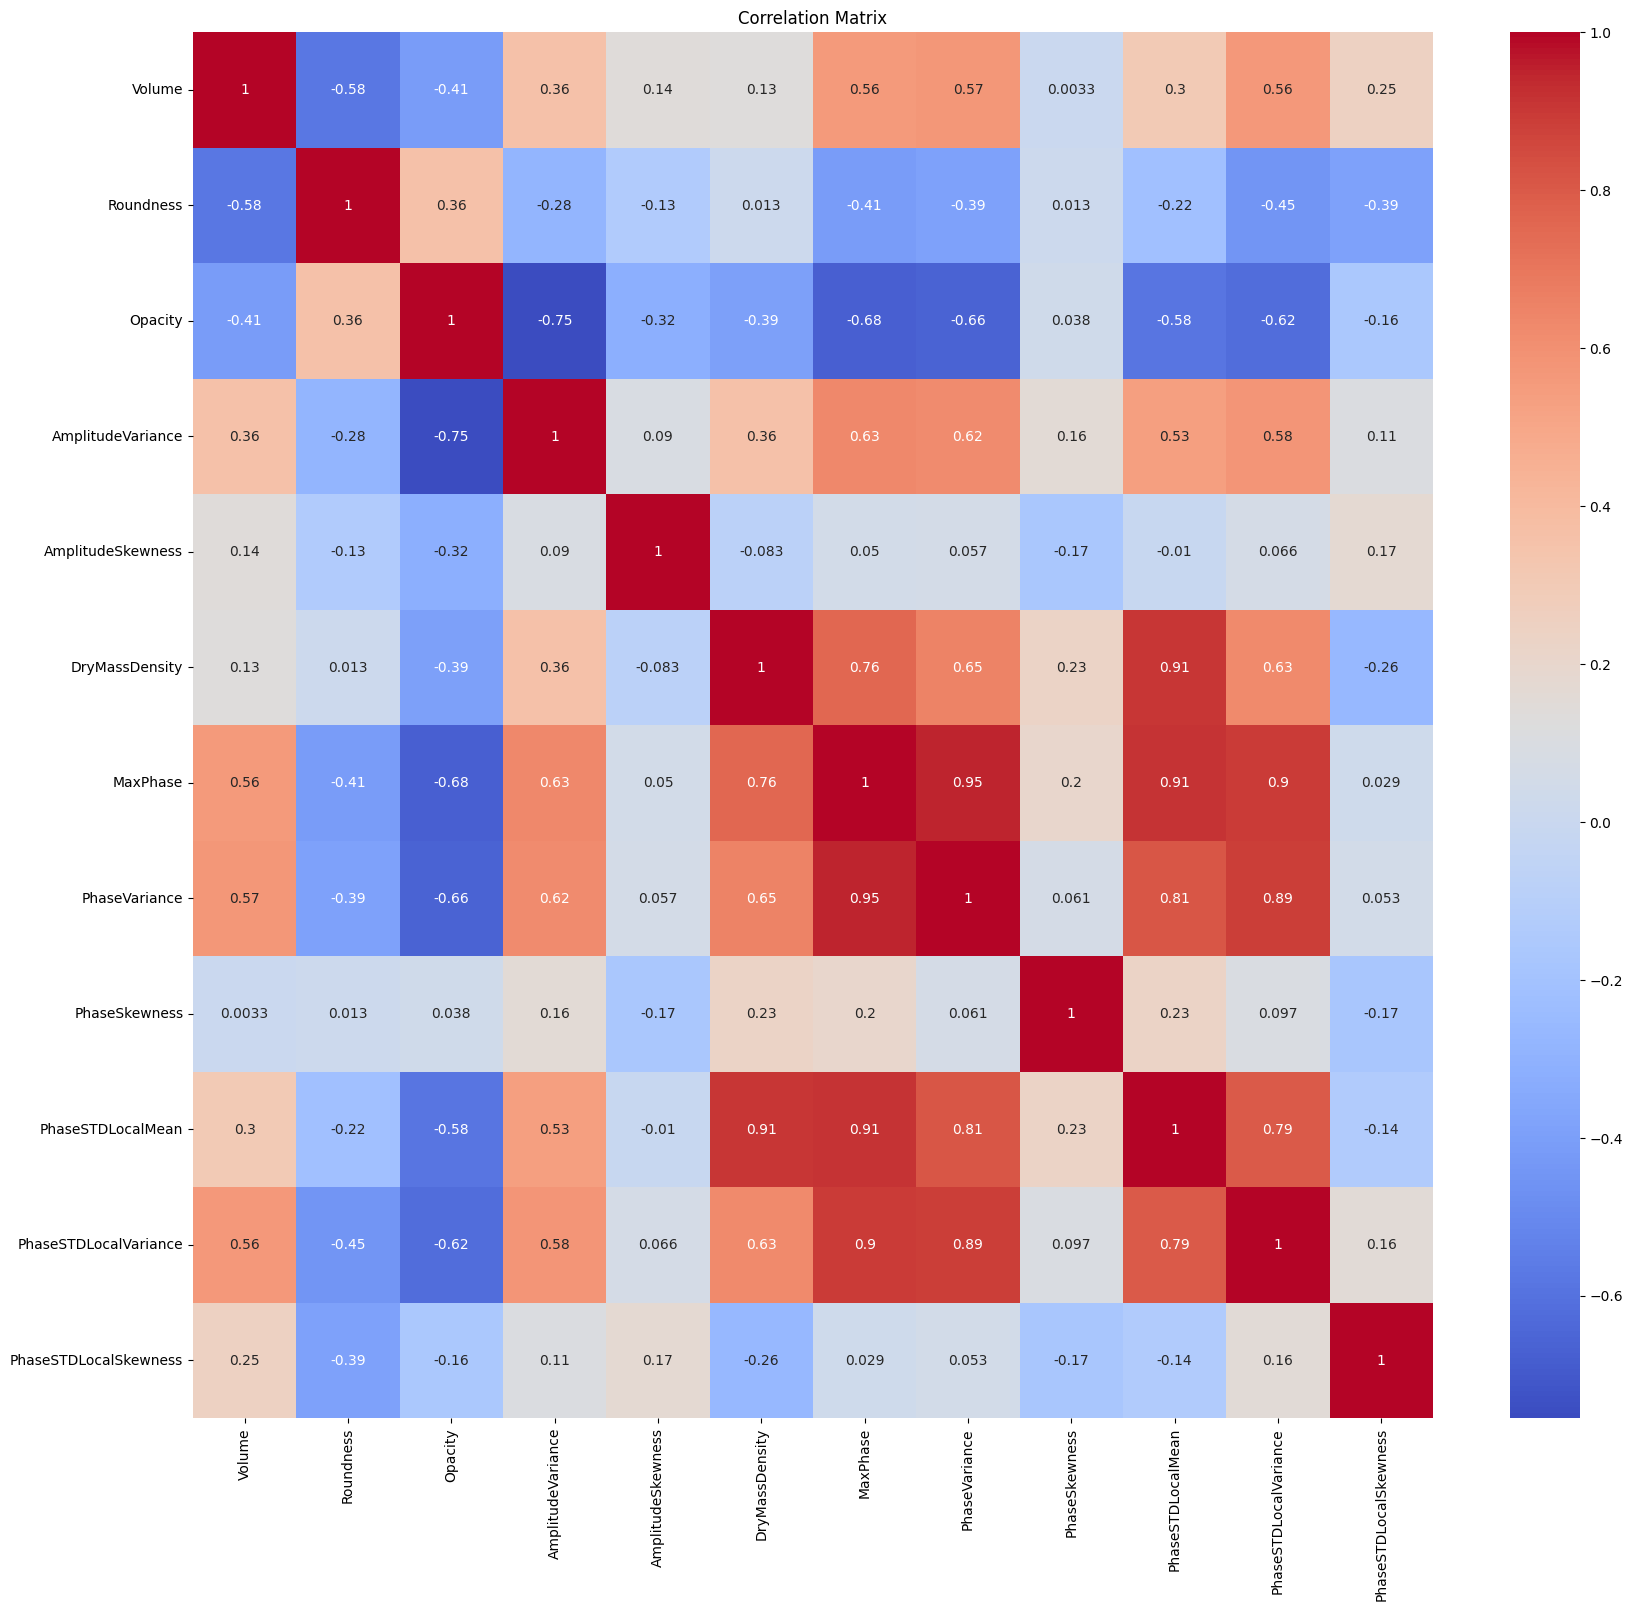

In [297]:
import seaborn as sns 
# Assuming you have a DataFrame called df with your features
correlation_matrix = df_unlabeled.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [372]:
col = ["caca", "peo"]
val = tuple([[2,2], [3,1]])
df = pd.DataFrame([val], columns=col)

In [373]:
df

,caca,peo
0,"[2, 2]","[3, 1]"


In [243]:
from sklearn.cluster import KMeans

df_unlabeled.dropna(axis=0, inplace=True)

# Step 2: Prepare the data
X = df_unlabeled.values

# Step 3: Choose the number of clusters
n_clusters = 5  # Specify the desired number of clusters

# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Step 5: Get the cluster labels
cluster_labels = kmeans.labels_

# Step 6: Add the cluster labels back to the DataFrame
df_unlabeled['Cluster'] = cluster_labels

/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


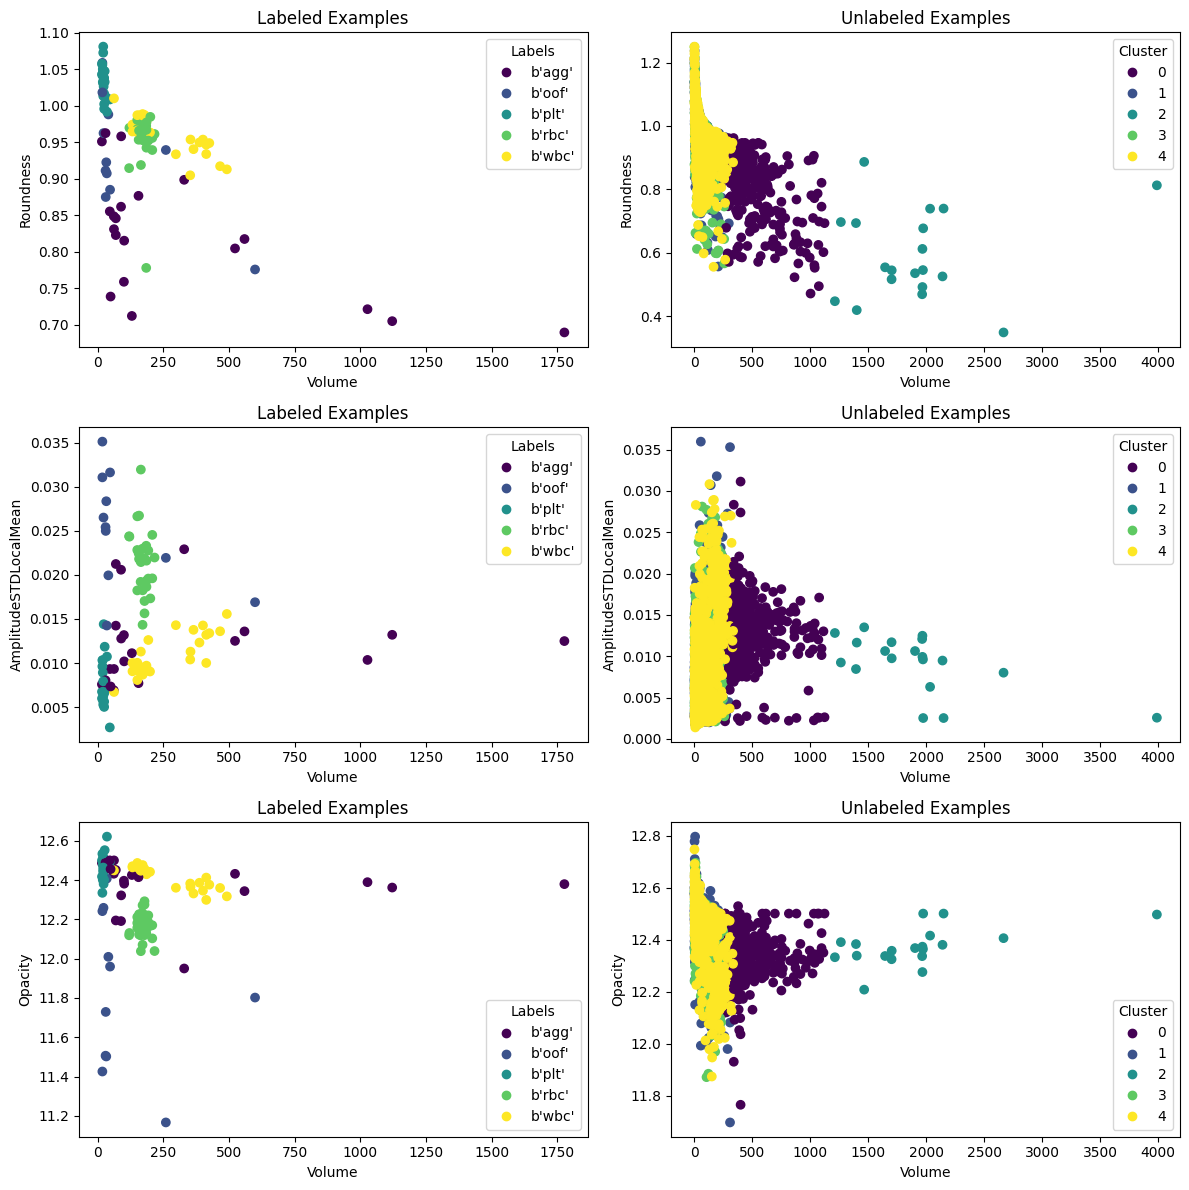

In [246]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the string labels into numerical values
encoded_labels = label_encoder.fit_transform(df_labeled['Labels'])

# Create subplots for labeled and unlabeled plots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot for labeled examples
scatter_labeled = axs[0, 0].scatter(df_labeled['Volume'], df_labeled['Roundness'], c=encoded_labels)
axs[0, 0].set_xlabel('Volume')
axs[0, 0].set_ylabel('Roundness')
axs[0, 0].set_title('Labeled Examples')

# Create a legend for labeled examples
handles, labels = scatter_labeled.legend_elements()
legend_labeled = axs[0, 0].legend(handles, label_encoder.classes_, title='Labels')

# Plot for unlabeled examples
scatter_unlabeled = axs[0, 1].scatter(df_unlabeled['Volume'], df_unlabeled['Roundness'], c=df_unlabeled['Cluster'])
axs[0, 1].set_xlabel('Volume')
axs[0, 1].set_ylabel('Roundness')
axs[0, 1].set_title('Unlabeled Examples')

# Add a legend for unlabeled examples
legend_unlabeled = axs[0, 1].legend(*scatter_unlabeled.legend_elements(), title='Cluster')

# Repeat the process for other features

scatter_labeled = axs[1, 0].scatter(df_labeled['Volume'], df_labeled['AmplitudeSTDLocalMean'], c=encoded_labels)
axs[1, 0].set_xlabel('Volume')
axs[1, 0].set_ylabel('AmplitudeSTDLocalMean')
axs[1, 0].set_title('Labeled Examples')

handles, labels = scatter_labeled.legend_elements()
legend_labeled = axs[1, 0].legend(handles, label_encoder.classes_, title='Labels')

scatter_unlabeled = axs[1, 1].scatter(df_unlabeled['Volume'], df_unlabeled['AmplitudeSTDLocalMean'], c=df_unlabeled['Cluster'])
axs[1, 1].set_xlabel('Volume')
axs[1, 1].set_ylabel('AmplitudeSTDLocalMean')
axs[1, 1].set_title('Unlabeled Examples')

legend_unlabeled = axs[1, 1].legend(*scatter_unlabeled.legend_elements(), title='Cluster')


scatter_labeled = axs[2, 0].scatter(df_labeled['Volume'], df_labeled['Opacity'], c=encoded_labels)
axs[2, 0].set_xlabel('Volume')
axs[2, 0].set_ylabel('Opacity')
axs[2, 0].set_title('Labeled Examples')

handles, labels = scatter_labeled.legend_elements()
legend_labeled = axs[2, 0].legend(handles, label_encoder.classes_, title='Labels')

scatter_unlabeled = axs[2, 1].scatter(df_unlabeled['Volume'], df_unlabeled['Opacity'], c=df_unlabeled['Cluster'])
axs[2, 1].set_xlabel('Volume')
axs[2, 1].set_ylabel('Opacity')
axs[2, 1].set_title('Unlabeled Examples')

legend_unlabeled = axs[2, 1].legend(*scatter_unlabeled.legend_elements(), title='Cluster')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

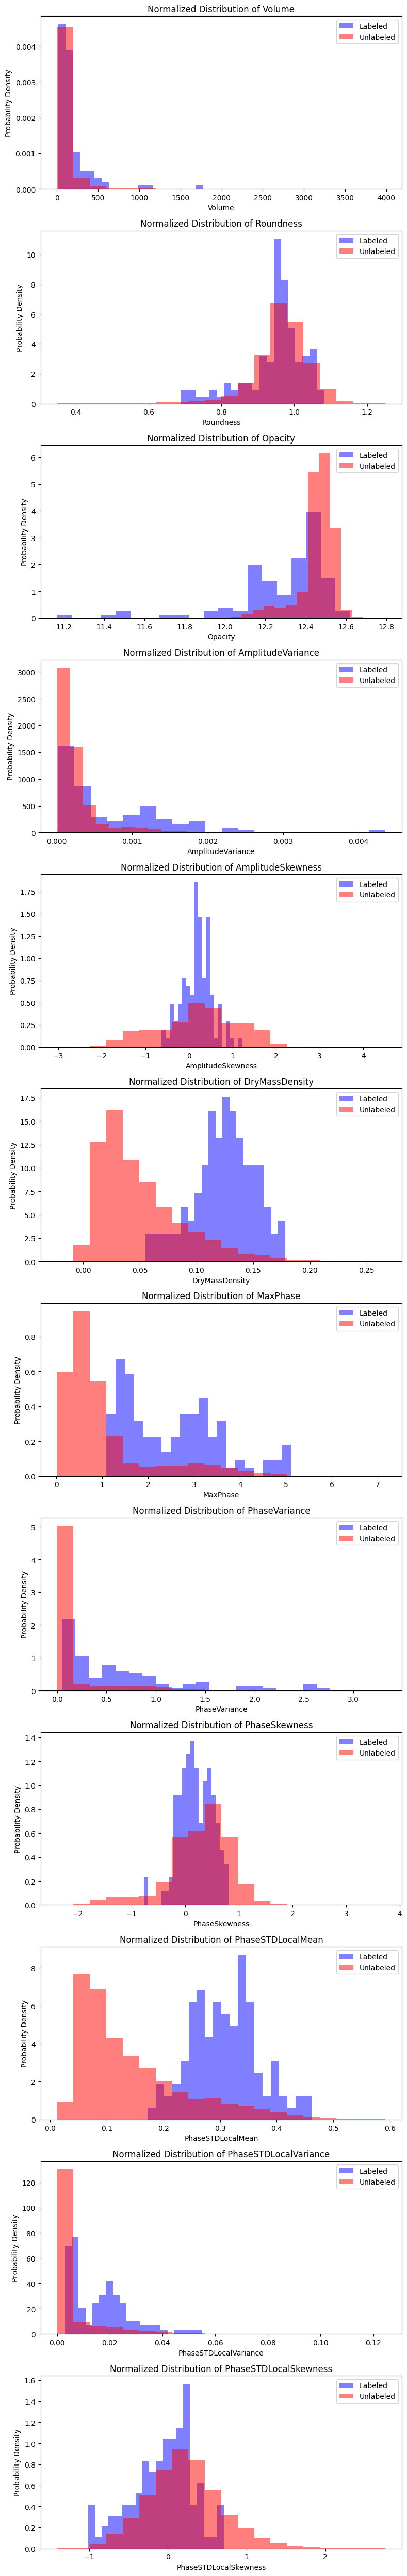

In [293]:
import matplotlib.pyplot as plt

# Select the features to visualize
features = ['Volume', 'Roundness', 'Opacity', 'AmplitudeVariance', 'AmplitudeSkewness', 'DryMassDensity', 'MaxPhase', 'PhaseVariance', 'PhaseSkewness', 'PhaseSTDLocalMean', 'PhaseSTDLocalVariance', 'PhaseSTDLocalSkewness']

# Create subplots for each feature
fig, axs = plt.subplots(len(features), 1, figsize=(8, 50))

# Plot the normalized distributions for labeled and unlabeled examples
for i, feature in enumerate(features):
    # Calculate the normalized histograms
    labeled_hist, labeled_bins, _ = axs[i].hist(df_labeled[feature], bins=20, alpha=0.5, density=True, label='Labeled', color='blue')
    unlabeled_hist, unlabeled_bins, _ = axs[i].hist(df_unlabeled[feature], bins=20, alpha=0.5, density=True, label='Unlabeled', color='red')

    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Probability Density')
    axs[i].legend()

    axs[i].set_title('Normalized Distribution of {}'.format(feature))

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [298]:
# Combine the labeled and unlabeled dataframes
df_combined = pd.concat([df_labeled, df_unlabeled], axis=0)

/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


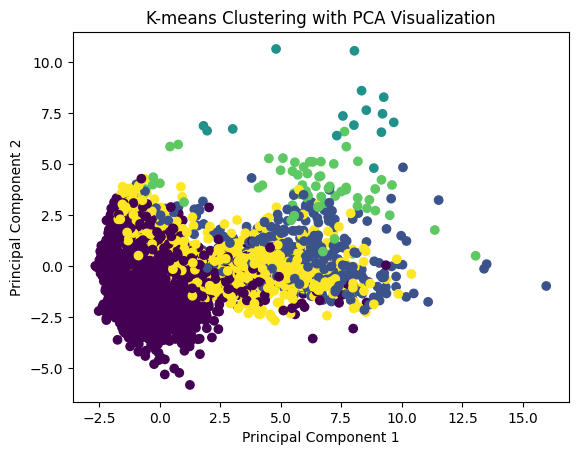

In [319]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 2: Prepare the data
X = df_combined[selected_columns].values

# Step 3: Choose the number of clusters
n_clusters = 5  # Specify the desired number of clusters

# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Step 5: Get the cluster labels
cluster_labels = kmeans.labels_

# Step 6: Add the cluster labels back to the DataFrame
df_combined['Cluster'] = cluster_labels

# Step 7: Apply PCA for dimensionality reduction
# Step 1: Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_combined[selected_columns])

# Step 2: Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Step 4: Perform PCA with the chosen number of components
pca = PCA(n_components=2)
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

# Step 8: Visualize the clusters using PCA
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=df_combined['Cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA Visualization')
plt.show()

# Label Propagation

In [336]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import confusion_matrix, classification_report

# Split the labeled data into training and evaluation sets
num_labeled = df_labeled.shape[0]
train_size = num_labeled // 2
X_train = df_labeled.iloc[:train_size, :-1].values
y_train = df_labeled.iloc[:train_size, -1].values
X_eval = df_labeled.iloc[train_size:, :-1].values
y_eval = df_labeled.iloc[train_size:, -1].values

# Remove additional columns from unlabeled data if necessary
df_unlabeled_ = df_unlabeled[df_unlabeled.columns[:X_train.shape[1]]]

# Concatenate the labeled and unlabeled data for training the LabelPropagation model
X_combined = np.concatenate([X_train, df_unlabeled_.values])
label_encoder = LabelEncoder()
y_combined = np.concatenate([label_encoder.fit_transform(y_train), np.array([-1] * df_unlabeled_.shape[0])])

# Train the LabelPropagation model
model = LabelPropagation()
model.fit(X_combined, y_combined)

# Predict labels for the evaluation set
y_pred = model.predict(X_eval)

y_pred = label_encoder.inverse_transform(y_pred)

# Calculate confusion matrix and classification report
confusion_mtx = confusion_matrix(y_eval, y_pred)
classification_rep = classification_report(y_eval, y_pred)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_mtx)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[ 5  2  2  0  2]
 [ 0  2  4  0  0]
 [ 0  3  8  0  0]
 [ 0  0  0 12  2]
 [ 1  1  0  5  7]]

Classification Report:
              precision    recall  f1-score   support

      b'agg'       0.83      0.45      0.59        11
      b'oof'       0.25      0.33      0.29         6
      b'plt'       0.57      0.73      0.64        11
      b'rbc'       0.71      0.86      0.77        14
      b'wbc'       0.64      0.50      0.56        14

    accuracy                           0.61        56
   macro avg       0.60      0.57      0.57        56
weighted avg       0.64      0.61      0.61        56



/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/semi_supervised/_label_propagation.py:318: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(
/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


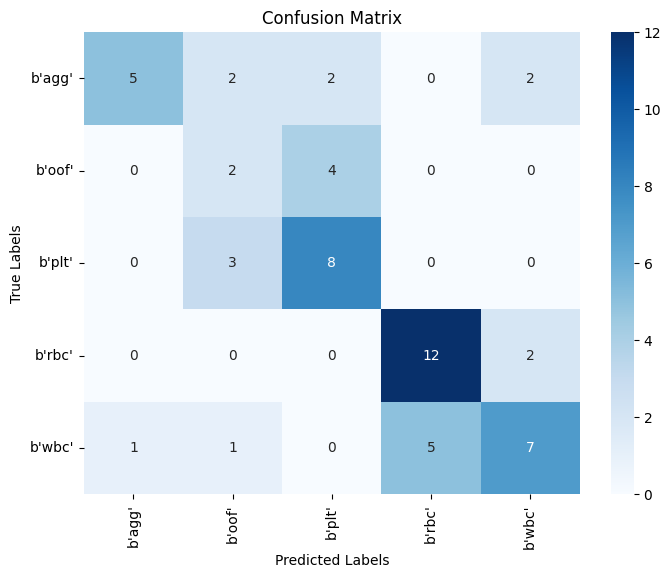

In [337]:

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix heatmap
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(np.unique(y_eval), rotation=90)
ax.yaxis.set_ticklabels(np.unique(y_eval), rotation=0)

# Show the plot
plt.show()

/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


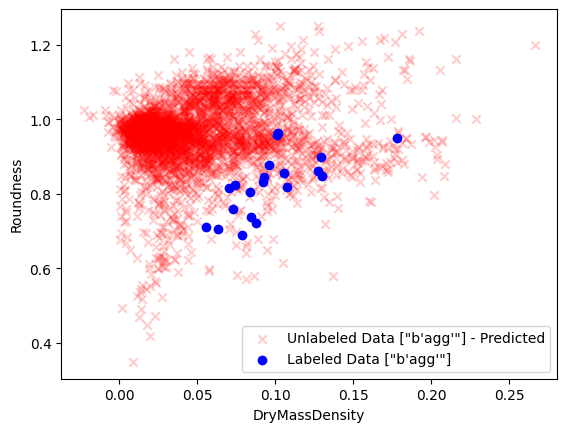

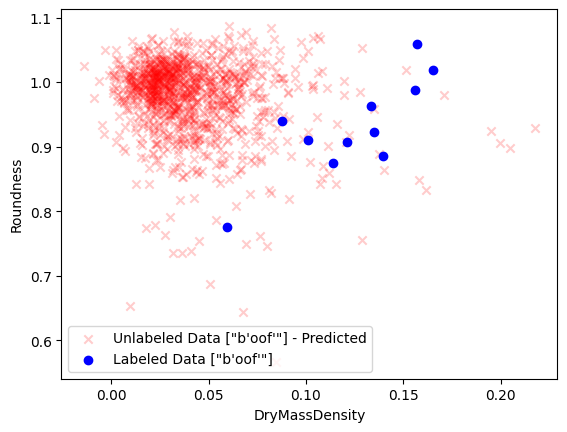

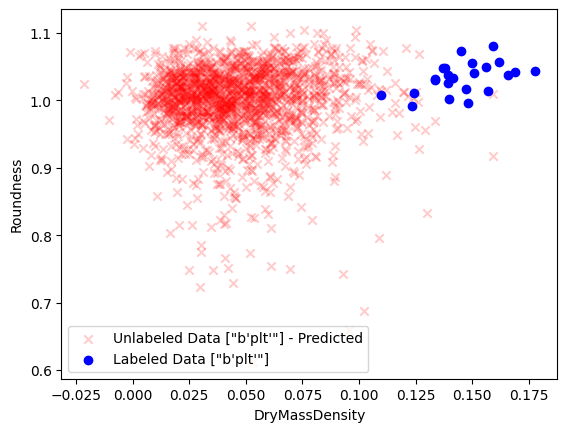

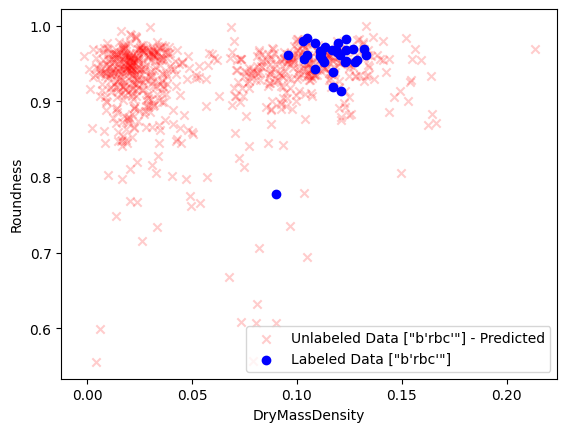

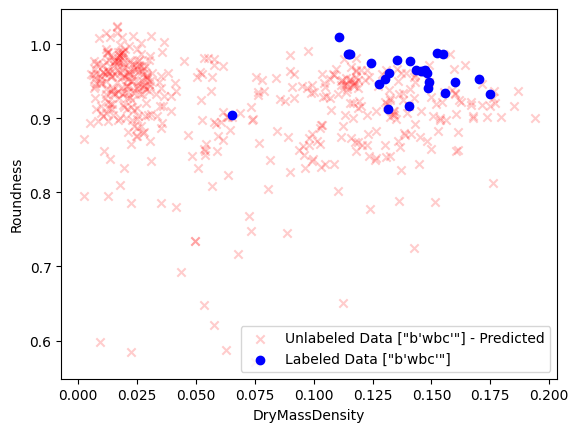

In [345]:

# Predict the labels for the unlabeled data
y_pred = label_spreading.predict(X_unlabeled)

# Decode the predicted labels back to their original string values
predicted_labels = label_encoder.inverse_transform(y_pred)

# Assign the predicted labels to the unlabeled dataframe
df_unlabeled['Labels'] = predicted_labels

# Get the unique labels
unique_labels = np.unique(y)


for label in range(0,5):
    # Plot the unlabeled data with predicted labels
    unlabeled_data = df_unlabeled[label_encoder.transform(df_unlabeled['Labels']) == label]
    plt.scatter(unlabeled_data['DryMassDensity'], unlabeled_data['Roundness'], color='red', marker='x', label=f'Unlabeled Data {label_encoder.inverse_transform([label])} - Predicted', alpha=0.2)
    # Plot the labeled data
    labeled_data = df_labeled[label_encoder.transform(df_labeled['Labels']) == label]
    plt.scatter(labeled_data['DryMassDensity'], labeled_data['Roundness'], color='blue', label=f'Labeled Data {label_encoder.inverse_transform([label])}')
    
    
    # Set plot labels and legend
    plt.xlabel('DryMassDensity')
    plt.ylabel('Roundness')
    plt.legend()
    
    # Show the plot
    plt.show()


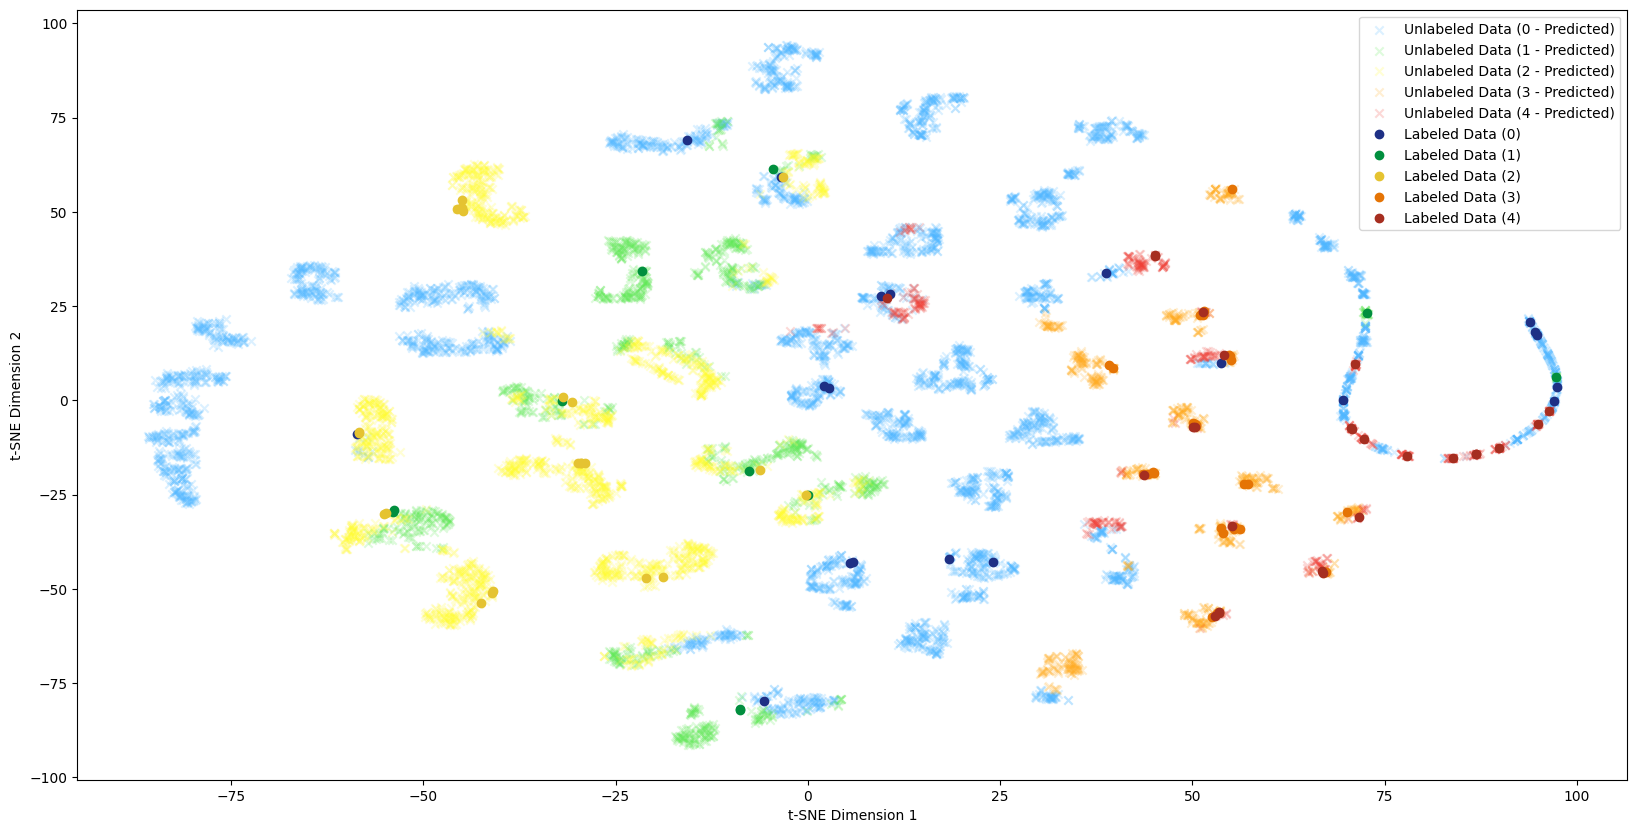

In [340]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Apply t-SNE to the combined data
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(df_combined[selected_columns])

# Separate the labeled and unlabeled data in the t-SNE space
tsne_labeled = tsne_data[:df_labeled.shape[0]]
tsne_unlabeled = tsne_data[df_labeled.shape[0]:]

# Get the unique labels
unique_labels = np.unique(y)

# Define the colors
colors = ['#4eb7ff', '#5ce952', '#fffb2a', '#ffad22', '#f04037']
darker_colors = ['#1E3085', '#018F3E', '#E5C331', '#E57405', '#A62E20']

plt.figure(figsize=(20, 10))
# Plot the unlabeled data with predicted labels in t-SNE space
for label in unique_labels:
    unlabeled_data = tsne_unlabeled[label_encoder.transform(df_unlabeled['Labels']) == label]
    plt.scatter(unlabeled_data[:, 0], unlabeled_data[:, 1], color=colors[label], marker='x', label=f'Unlabeled Data ({label} - Predicted)', alpha=0.2)

# Plot the labeled data in t-SNE space
for label in unique_labels:
    labeled_data = tsne_labeled[label_encoder.transform(df_labeled['Labels']) == label]
    plt.scatter(labeled_data[:, 0], labeled_data[:, 1], color=darker_colors[label], label=f'Labeled Data ({label})')

# Set plot labels and legend
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Show the plot
plt.show()

# Self Training

/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rai/.pyenv/versions/3.11.3/envs/ami/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


Classification Report:
              precision    recall  f1-score   support

      b'agg'       1.00      0.18      0.31        11
      b'oof'       0.00      0.00      0.00         6
      b'plt'       0.55      1.00      0.71        11
      b'rbc'       0.45      0.93      0.60        14
      b'wbc'       0.60      0.21      0.32        14

    accuracy                           0.52        56
   macro avg       0.52      0.46      0.39        56
weighted avg       0.57      0.52      0.43        56



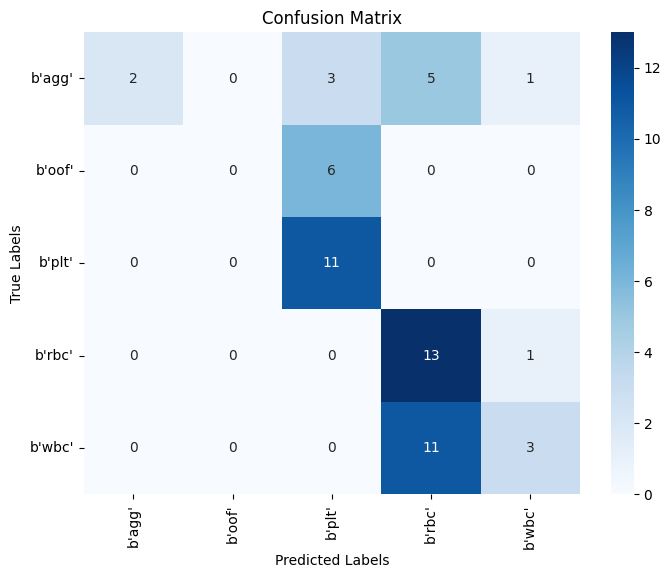

In [330]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.semi_supervised import SelfTrainingClassifier
# Split the labeled data into training and evaluation sets
num_labeled = df_labeled.shape[0]
train_size = num_labeled // 2
X_train = df_labeled.iloc[:train_size, :-1].values
y_train = df_labeled.iloc[:train_size, -1].values
X_eval = df_labeled.iloc[train_size:, :-1].values
y_eval = df_labeled.iloc[train_size:, -1].values

# Remove additional columns from unlabeled data if necessary
df_unlabeled_ = df_unlabeled[df_unlabeled.columns[:X_train.shape[1]]]

# Concatenate the labeled and unlabeled data for training the LabelPropagation model
X_combined = np.concatenate([X_train, df_unlabeled_.values])
label_encoder = LabelEncoder()
y_combined = np.concatenate([label_encoder.fit_transform(y_train), np.array([-1] * df_unlabeled_.shape[0])])

# Train the LabelPropagation model
svc = SVC(probability=True, gamma="auto")
model = SelfTrainingClassifier(svc)
model.fit(X_combined, y_combined)

# Predict labels for the evaluation set
y_pred = model.predict(X_eval)

y_pred = label_encoder.inverse_transform(y_pred)

# Calculate confusion matrix and classification report
confusion_mtx = confusion_matrix(y_eval, y_pred)
classification_rep = classification_report(y_eval, y_pred)

print("\nClassification Report:")
print(classification_rep)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix heatmap
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(np.unique(y_eval), rotation=90)
ax.yaxis.set_ticklabels(np.unique(y_eval), rotation=0)

# Show the plot
plt.show()

/tmp/ipykernel_5226/3920148249.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label_colors = plt.cm.get_cmap('jet', len(unique_labels))


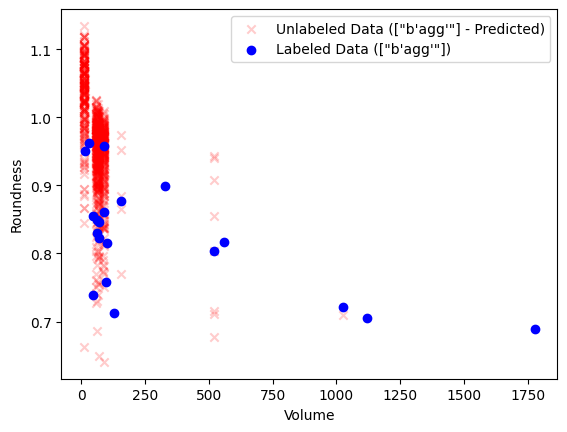

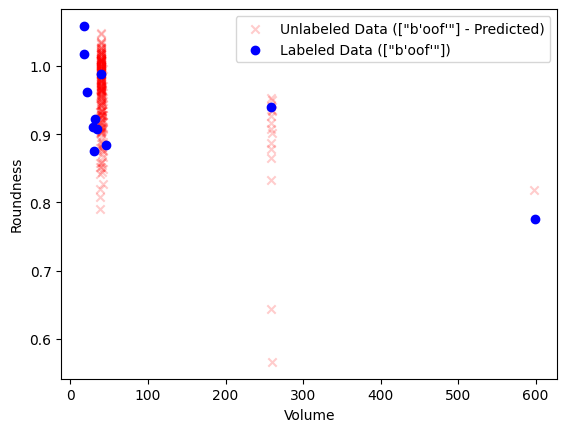

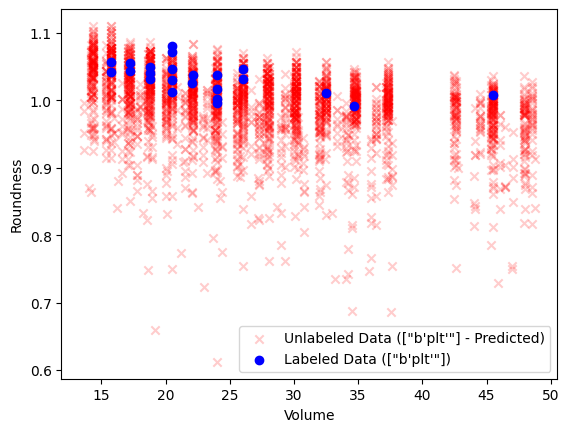

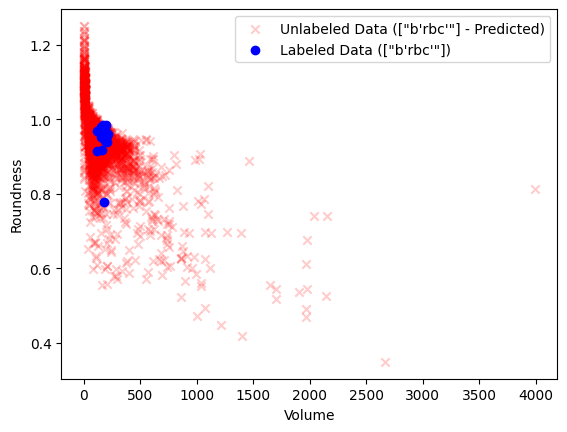

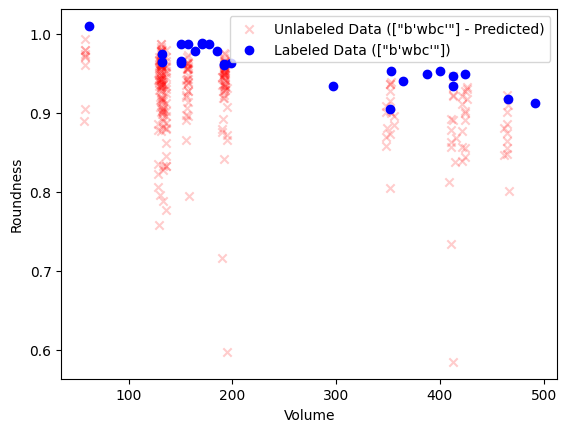

In [333]:
# Predict the labels for the unlabeled data
y_pred = model.predict(X_unlabeled)

# Decode the predicted labels back to their original string values
predicted_labels = label_encoder.inverse_transform(y_pred)

# Assign the predicted labels to the unlabeled dataframe
del df_unlabeled['Labels']
df_unlabeled['Labels'] = predicted_labels

# Get the unique labels
unique_labels = np.unique(y)

# Assign colors to the labels for visualization
label_colors = plt.cm.get_cmap('jet', len(unique_labels))
for label in range(0,5):
    # Plot the unlabeled data with predicted labels
    #for label in unique_labels:
    unlabeled_data = df_unlabeled[label_encoder.transform(df_unlabeled['Labels']) == label]
    plt.scatter(unlabeled_data['Volume'], unlabeled_data['Roundness'], color='red', marker='x', label=f'Unlabeled Data ({label_encoder.inverse_transform([label])} - Predicted)', alpha=0.2)
    # Plot the labeled data
    #for label in unique_labels:
    labeled_data = df_labeled[label_encoder.transform(df_labeled['Labels']) == label]
    plt.scatter(labeled_data['Volume'], labeled_data['Roundness'], color='blue', label=f'Labeled Data ({label_encoder.inverse_transform([label])})')
    
    
    # Set plot labels and legend
    plt.xlabel('Volume')
    plt.ylabel('Roundness')
    plt.legend()
    
    # Show the plot
    plt.show()

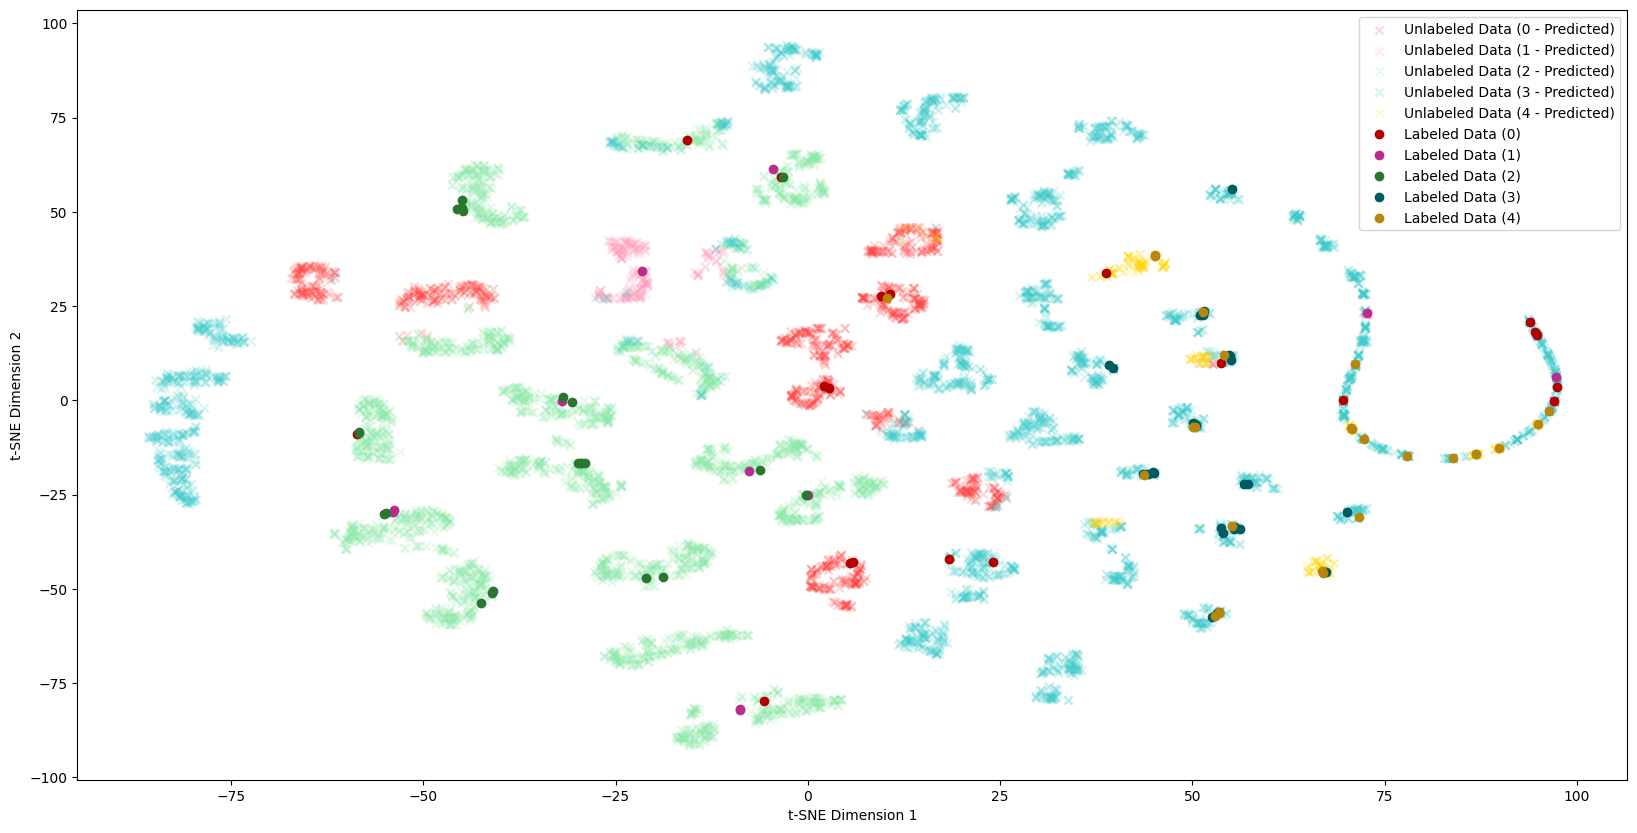

In [332]:
# Define the colors
colors = ['#FF3D3D', '#FF96B6', '#82E9A1', '#3BCBCA', '#FFD700']
darker_colors = ['#B30000', '#B82E8E', '#2C7530', '#005B60', '#B8860B']

plt.figure(figsize=(20, 10))
# Plot the unlabeled data with predicted labels in t-SNE space
for label in unique_labels:
    unlabeled_data = tsne_unlabeled[label_encoder.transform(df_unlabeled['Labels']) == label]
    plt.scatter(unlabeled_data[:, 0], unlabeled_data[:, 1], color=colors[label], marker='x', label=f'Unlabeled Data ({label} - Predicted)', alpha=0.2)

# Plot the labeled data in t-SNE space
for label in unique_labels:
    labeled_data = tsne_labeled[label_encoder.transform(df_labeled['Labels']) == label]
    plt.scatter(labeled_data[:, 0], labeled_data[:, 1], color=darker_colors[label], label=f'Labeled Data ({label})')

# Set plot labels and legend
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Show the plot
plt.show()